<a href="https://colab.research.google.com/github/joekibz/moringa-wk4/blob/main/Wk4_Tue_15_Nov_HR_Classifier_Project1_%5BJoseph_Thiongo%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning - Independent Project - HR Promotions 

<h3><b>Background</b></h3>


HR analytics is revolutionising the way human resources departments operate, leading
to higher efficiency and better results overall. Human resources have been using
analytics for years. However, the collection, processing, and analysis of data have been
largely manual, and given the nature of human resources dynamics and HR KPIs, the
approach has been constraining HR. Therefore, it is surprising that HR departments
woke up to the utility of machine learning so late in the game.<br><br>
<b>Problem Statement</b>
<br><br>Your client is a large Multinational Corporation, and they have nine broad verticals
across the organization. One of the problems your client faces is identifying the right
people for promotion (only for the manager position and below) and preparing them in
time.
Currently the process, they are following is:<br>
● They first identify a set of employees based on recommendations/ past
performance.<br>
● Selected employees go through the separate training and evaluation program for
each vertical.<br>
● These programs are based on the required skill of each vertical. At the end of the
program, based on various factors such as training performance, KPI completion
(only employees with KPIs completed greater than 60% are considered) etc., the
employee gets a promotion.<br><br>

For the process mentioned above, the final promotions are only announced after the
evaluation, and this leads to a delay in transition to their new roles. Hence, the company
needs your help in identifying the eligible candidates at a particular checkpoint so that
they can expedite the entire promotion cycle.<br><br>
They have provided multiple attributes around employees’ past and current performance
along with demographics. Now, The task is to predict whether a potential promotee at a
checkpoint will be promoted or not after the evaluation process.

<h3><b>Defining Metric for Success</b></h3>

A trained model that can predict which employees are up for promotion and which ones are not

#<h3><b>Approach to be used for the model build</b></h3>

1- Import the data <br>
2- Explore the data using visualization <br>
3- Data Preparation <br>
4- Split <br>
5- Build Model <br>
+Baseline <br>
+Train the model <br>
6- Evaluate <br>
7- Communicate <br>

#1- Import the Data

In [126]:
#Import the libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
#from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
#from sklearn.pipeline import make_pipeline

In [127]:
data = pd.read_csv("https://bit.ly/2ODZvLCHRDataset")

#explore the data shape
print(f"There are {len(data)} rows in the Dataset")
print(f"The Dataset has {data.shape[1]} features")
data.head()

There are 54808 rows in the Dataset
The Dataset has 14 features


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [128]:
#Dataset info
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [129]:
#Statistical Summary of the Dataset
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#2- Explore the data using visualization

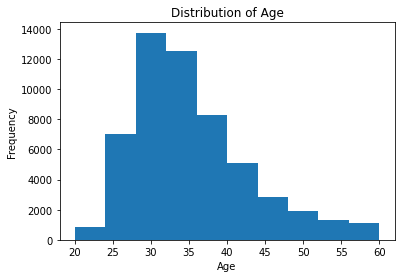

In [130]:
#Exploring Staff Age distribution

plt.hist(data['age'])

# Tweak & Label 
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display
plt.show() 

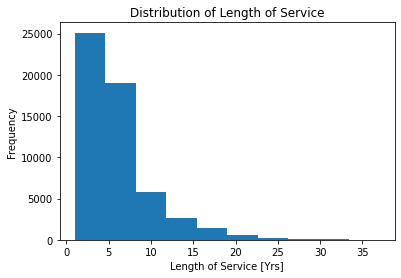

In [131]:
#Exploring Length of Service distribution

plt.hist(data['length_of_service'])

# Tweak & Label 
plt.title('Distribution of Length of Service')
plt.xlabel('Length of Service [Yrs]')
plt.ylabel('Frequency')

# Display
plt.show() 


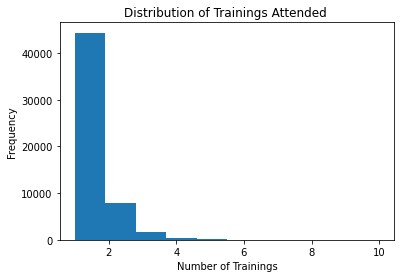

In [132]:
#Exploring Number of Trainings
plt.hist(data['no_of_trainings'])

# Tweak & Label 
plt.title('Distribution of Trainings Attended ')
plt.xlabel('Number of Trainings')
plt.ylabel('Frequency')

# Display
plt.show() 

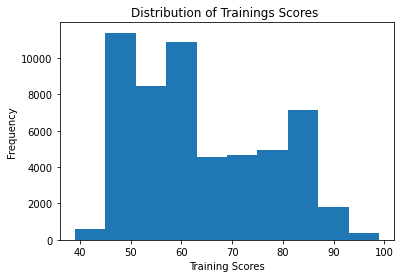

In [133]:
#Exploring training scores
plt.hist(data['avg_training_score'])

# Tweak & Label 
plt.title('Distribution of Trainings Scores ')
plt.xlabel('Training Scores')
plt.ylabel('Frequency')

# Display
plt.show() 

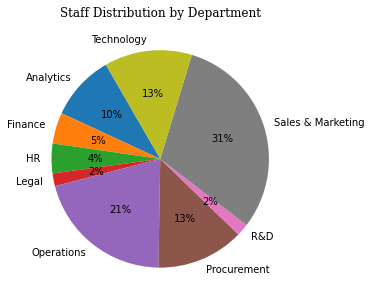

In [134]:
#Exploring Staff numbers by department


mfsum = (
    data.groupby("department", as_index=False)["gender"].count()
)#.to_frame()


dpt = mfsum["department"]
cnt = mfsum["gender"]

# Render
plt.figure(figsize=(8, 5))
plt.pie(cnt, labels = dpt, startangle = 120, autopct = '%.0f%%')

# Tweak & Label
plt.title('Staff Distribution by Department', fontdict= {'fontname': 'Serif', 'fontsize': 12})  

# Display
plt.show()



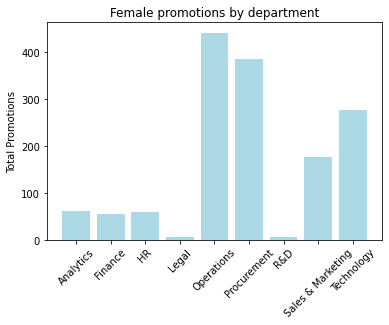

In [135]:
#Exploring female promotions in the firm

fp = data[data["gender"] =='f'].groupby("department", as_index=False)["is_promoted"].sum()

plt.bar(fp["department"], height = fp["is_promoted"], color='lightblue')

# Tweak and Label
plt.ylabel('Total Promotions')
plt.xticks(rotation = 45)
plt.title('Female promotions by department')

# Display
plt.show()


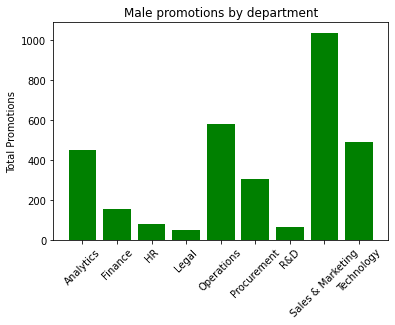

In [136]:
#Exploring male promotions in the firm

mp = data[data["gender"] =='m'].groupby("department", as_index=False)["is_promoted"].sum()

plt.bar(mp["department"], height = mp["is_promoted"], color='green')

# Tweak and Label
plt.ylabel('Total Promotions')
plt.xticks(rotation = 45)
plt.title('Male promotions by department')

# Display
plt.show()

In [137]:
#Promotion column value counts
p1=data['is_promoted'].value_counts(normalize=True)
print("Staff promoted %: ",p1[1]*100)
print("Staff NOT promoted %: ",p1[0]*100)

Staff promoted %:  8.517004816815064
Staff NOT promoted %:  91.48299518318494


Strong positive correlation noted between Age and Length of Service


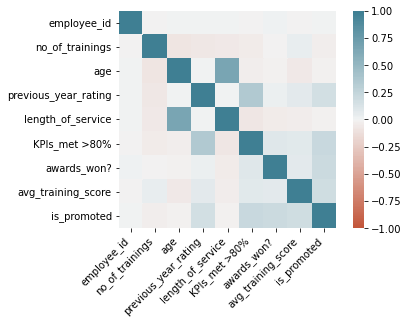

In [138]:
#Investigating co-relations
cor=data.corr()

ax = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

print("Strong positive correlation noted between Age and Length of Service")

#3- Data Preparation

In [139]:
#Checking for nulls

print("Alot of null entries in feature education and previous_year_rating")
data.isnull().sum()

Alot of null entries in feature education and previous_year_rating


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [140]:
#Impute 0 where null in previous_year_rating
data["previous_year_rating"].fillna(0, inplace = True)
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [141]:
#Impute '0' where null in education
data["education"].fillna('0', inplace = True)
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [142]:
#Check for duplicates
dp = data[data.duplicated()]
dp.shape;
dp.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [143]:
#The wrangle function....convert 'Str' type columns to 'numeric'
def wrangle(data):
  dict_edu={
    "Bachelor's":1,
    "Below Secondary":2,
    "Master's & above":3

  }

  dict_gdr={
    "m":2,
    "f":3
  }

  dict_recruit={
    "other":1,
    "referred":2,
    "sourcing":3
  }



  df1= data.replace({'department':dict_dept})
  df1['region'] = df1['region'].str.split('_').str[-1].astype(float)
  df1= df1.replace({'education':dict_edu})
  df1= df1.replace({'gender':dict_gdr})
  df1= df1.replace({'recruitment_channel':dict_recruit})


  df1['department'] = df1['department'].astype(float)
  df1['education'] = df1['education'].astype(float)
  df1['gender'] = df1['gender'].astype(float)
  df1['recruitment_channel'] = df1['recruitment_channel'].astype(float)

  return df1


In [144]:
#Extract prepared df
df = wrangle(data)
df.head()
#df.shape

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7.0,7.0,3.0,3.0,3.0,1,35,5.0,8,1,0,49,0
1,65141,4.0,22.0,1.0,2.0,1.0,1,30,5.0,4,0,0,60,0
2,7513,7.0,19.0,1.0,2.0,3.0,1,34,3.0,7,0,0,50,0
3,2542,7.0,23.0,1.0,2.0,1.0,2,39,1.0,10,0,0,50,0
4,48945,8.0,26.0,1.0,2.0,1.0,1,45,3.0,2,0,0,73,0


#4- Split

In [145]:
#Define target and features set
target = "is_promoted"
features = df.drop(columns=[target,'employee_id'])
target = df[target]

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (54808, 12)
Target shape: (54808,)


In [146]:
#Do the split 
F_train, F_test, t_train, t_test = train_test_split(
    features,target, test_size=0.2, random_state=42
)

print("F_train shape:", F_train.shape)
print("t_train shape:", t_train.shape)
print("F_test shape:", F_test.shape)
print("t_test shape:", t_test.shape)

F_train shape: (43846, 12)
t_train shape: (43846,)
F_test shape: (10962, 12)
t_test shape: (10962,)


#5- Build Model

<h3>Baseline</h3>

In [147]:
acc_baseline = t_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9142


<h3>Iterate</h3>

In [148]:
#classifier
clf = RandomForestClassifier(random_state=42)
print(clf)

RandomForestClassifier(random_state=42)


In [149]:
#Create grid for hyperparameter search test
params = {
    "n_estimators": range(25,101,25),
    "max_depth": range(10,51,10)
}
params

{'n_estimators': range(25, 101, 25), 'max_depth': range(10, 51, 10)}

In [150]:
#Create gridSearch model ...
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)},
             verbose=1)

In [151]:
#Fit model to training data
model.fit(F_train, t_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)},
             verbose=1)

In [152]:
#Extract Model best params
model.best_params_

{'max_depth': 20, 'n_estimators': 100}

#6- Evaluate

In [153]:
#checking the model performance scores
acc_train = model.score(F_train, t_train)
acc_test = model.score(F_test, t_test)

print("Training set Accuracy:", round(acc_train, 4))
print("Test set Accuracy:", round(acc_test, 4))

Training set Accuracy: 0.977
Test set Accuracy: 0.9361


In [154]:
#charting confusion matrix to compare model performance with actual test target values
t_test.value_counts()

0    10054
1      908
Name: is_promoted, dtype: int64

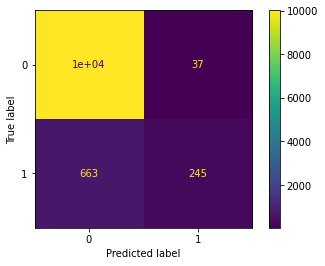

In [155]:
#plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, F_test, t_test)

#7- Communicate results

<b>The Model performance was as follows:<br></b>
+Training set Accuracy: 0.977<br>
+Test set Accuracy: 0.9361<br>

<b>Best combination of hyperparameters was:<br></b>
{'max_depth': 20, 'n_estimators': 100}

In [156]:
#Below the Model specs...
print(model)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)},
             verbose=1)


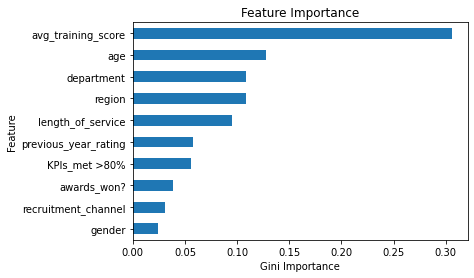

In [157]:
#Below were the most important features used by the model for making predictions

feat1 = F_train.columns

#extract importances frm model
importances = model.best_estimator_.feature_importances_

feat_imp = pd.Series(importances, index=feat1).sort_values()

# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");